In [1]:
#cuda v.11.4
#tensorflow 2.x

from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255)
train_generator= data_generator.flow_from_directory(
    './111/db/train',
    target_size=(512,256),
    batch_size=106,
    class_mode='sparse',
    color_mode='grayscale'
    
)
(X_train, y_train) = train_generator.next()
print(X_train[0].shape)
val_generator= data_generator.flow_from_directory(
    './111/db/val',
    target_size=(512,256),
    batch_size=34,
    class_mode='sparse',
    color_mode='grayscale'
    
)
(X_val, y_val) = val_generator.next()
print(X_train[0].shape)
test_generator= data_generator.flow_from_directory(
    './111/db/test_1',
    target_size=(512,256),
    batch_size=12,
    class_mode='sparse',
    color_mode='grayscale'
    
)
(X_test, y_test) = test_generator.next()
print(X_train[0])

Found 106 images belonging to 2 classes.
(512, 256, 1)
Found 34 images belonging to 2 classes.
(512, 256, 1)
Found 12 images belonging to 2 classes.
[[[0.8470589 ]
  [0.9215687 ]
  [0.9607844 ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[0.8470589 ]
  [0.9215687 ]
  [0.9607844 ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[0.89019614]
  [0.94117653]
  [0.94117653]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 ...

 [[0.48627454]
  [0.47450984]
  [0.43921572]
  ...
  [0.882353  ]
  [0.92549026]
  [0.9058824 ]]

 [[0.47058827]
  [0.47450984]
  [0.43137258]
  ...
  [0.882353  ]
  [0.91372555]
  [0.882353  ]]

 [[0.47058827]
  [0.47450984]
  [0.43137258]
  ...
  [0.882353  ]
  [0.91372555]
  [0.882353  ]]]


In [2]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from keras import Input
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add
from keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras import optimizers


In [3]:

img_height = 512
img_width = 256
num_classes = 2

import matplotlib.pyplot as plt
#normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [4]:

model = Sequential([
  layers.Conv2D(64, kernel_size=(7,7), strides=(1,1), padding='same',input_shape=(img_height, img_width,1)),
  layers.BatchNormalization(),
  layers.LeakyReLU(alpha=0.3),
  layers.MaxPooling2D(pool_size=(2, 2)),
  
  layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same'),
  layers.LeakyReLU(alpha=0.3),
  layers.Conv2D(128, kernel_size=(5,5), strides=(1,1), padding='same'),
  layers.LeakyReLU(alpha=0.3),
  layers.MaxPooling2D(pool_size=(2, 2)),
    
  layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same'),
  layers.BatchNormalization(),
  layers.LeakyReLU(alpha=0.3),
  layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same'),
  layers.BatchNormalization(),
  layers.LeakyReLU(alpha=0.3),
  layers.MaxPooling2D(pool_size=(2, 2)),
    
  layers.Conv2D(256, kernel_size=(1,1), strides=(1,1), padding='same'),
  layers.LeakyReLU(alpha=0.3),
  layers.Conv2D(256, kernel_size=(1,1), strides=(1,1), padding='same'),
  layers.LeakyReLU(alpha=0.3),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(512, kernel_size=(1,1), strides=(1,1), padding='same'),
  layers.LeakyReLU(alpha=0.3),
  layers.BatchNormalization(),
  layers.Conv2D(512, kernel_size=(1,1), strides=(1,1), padding='same'),
  layers.LeakyReLU(alpha=0.3),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(64, kernel_size=(1,1), strides=(1,1), padding='same'),
  layers.LeakyReLU(alpha=0.3),
  layers.BatchNormalization(),
  layers.Conv2D(64, kernel_size=(1,1), strides=(1,1), padding='same'),
  layers.LeakyReLU(alpha=0.3),
    
  layers.Flatten(),
  layers.Dense(512),
  layers.LeakyReLU(alpha=0.3),
  layers.Dropout(0.3),
  layers.Dense(256),
  layers.LeakyReLU(alpha=0.3),
  layers.Dropout(0.3),
  layers.Dense(num_classes,activation='softmax')
])

In [5]:
batch_size = 10
epochs=800
model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-7),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 256, 64)      3200      
_________________________________________________________________
batch_normalization (BatchNo (None, 512, 256, 64)      256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512, 256, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 128, 128)     73856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 128, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 128, 128)     4

In [6]:

history = model.fit(
  X_train,y_train,
  validation_data=(X_val,y_val),
  epochs=epochs,
  batch_size=batch_size
)

Epoch 1/800
11/11 [==============================] - 21s 970ms/step - loss: 0.8725 - accuracy: 0.5564 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/800
11/11 [==============================] - 2s 212ms/step - loss: 1.1319 - accuracy: 0.4254 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/800
11/11 [==============================] - 2s 156ms/step - loss: 0.9802 - accuracy: 0.4835 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 4/800
11/11 [==============================] - 2s 160ms/step - loss: 0.8663 - accuracy: 0.5551 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 5/800
11/11 [==============================] - 2s 179ms/step - loss: 0.8872 - accuracy: 0.5150 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 6/800
11/11 [==============================] - 2s 167ms/step - loss: 0.8330 - accuracy: 0.5055 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 7/800
11/11 [==============================] - 2s 155ms/step - loss: 0.8137 - accuracy: 0.4980 - val_loss: 0.6973 - val_accuracy: 0.500

Epoch 58/800
11/11 [==============================] - 2s 153ms/step - loss: 0.5809 - accuracy: 0.6999 - val_loss: 0.7187 - val_accuracy: 0.5294
Epoch 59/800
11/11 [==============================] - 2s 152ms/step - loss: 0.5128 - accuracy: 0.7331 - val_loss: 0.7188 - val_accuracy: 0.5294
Epoch 60/800
11/11 [==============================] - 2s 152ms/step - loss: 0.4802 - accuracy: 0.7493 - val_loss: 0.7203 - val_accuracy: 0.5294
Epoch 61/800
11/11 [==============================] - 2s 151ms/step - loss: 0.6165 - accuracy: 0.6228 - val_loss: 0.7197 - val_accuracy: 0.5588
Epoch 62/800
11/11 [==============================] - 2s 153ms/step - loss: 0.5428 - accuracy: 0.7359 - val_loss: 0.7196 - val_accuracy: 0.5294
Epoch 63/800
11/11 [==============================] - 2s 164ms/step - loss: 0.5232 - accuracy: 0.7583 - val_loss: 0.7203 - val_accuracy: 0.5000
Epoch 64/800
11/11 [==============================] - 2s 165ms/step - loss: 0.4590 - accuracy: 0.8169 - val_loss: 0.7201 - val_accuracy:

Epoch 115/800
11/11 [==============================] - 2s 150ms/step - loss: 0.3748 - accuracy: 0.8485 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 116/800
11/11 [==============================] - 2s 150ms/step - loss: 0.3611 - accuracy: 0.9104 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 117/800
11/11 [==============================] - 2s 150ms/step - loss: 0.4505 - accuracy: 0.8196 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 118/800
11/11 [==============================] - 2s 150ms/step - loss: 0.3335 - accuracy: 0.8889 - val_loss: 0.6972 - val_accuracy: 0.5294
Epoch 119/800
11/11 [==============================] - 2s 150ms/step - loss: 0.3845 - accuracy: 0.8509 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 120/800
11/11 [==============================] - 2s 150ms/step - loss: 0.3914 - accuracy: 0.7628 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 121/800
11/11 [==============================] - 2s 150ms/step - loss: 0.3254 - accuracy: 0.8881 - val_loss: 0.6923 - val_ac

11/11 [==============================] - 2s 150ms/step - loss: 0.2414 - accuracy: 0.9091 - val_loss: 0.6599 - val_accuracy: 0.5882
Epoch 228/800
11/11 [==============================] - 2s 150ms/step - loss: 0.2204 - accuracy: 0.9502 - val_loss: 0.6587 - val_accuracy: 0.5882
Epoch 229/800
11/11 [==============================] - 2s 149ms/step - loss: 0.2569 - accuracy: 0.9304 - val_loss: 0.6582 - val_accuracy: 0.5882
Epoch 230/800
11/11 [==============================] - 2s 150ms/step - loss: 0.2138 - accuracy: 0.9538 - val_loss: 0.6569 - val_accuracy: 0.5882
Epoch 231/800
11/11 [==============================] - 2s 150ms/step - loss: 0.1967 - accuracy: 0.9417 - val_loss: 0.6566 - val_accuracy: 0.5882
Epoch 232/800
11/11 [==============================] - 2s 150ms/step - loss: 0.2427 - accuracy: 0.9242 - val_loss: 0.6553 - val_accuracy: 0.5882
Epoch 233/800
11/11 [==============================] - 2s 149ms/step - loss: 0.2112 - accuracy: 0.9410 - val_loss: 0.6564 - val_accuracy: 0.5882

11/11 [==============================] - 2s 151ms/step - loss: 0.1239 - accuracy: 0.9740 - val_loss: 0.6513 - val_accuracy: 0.6176
Epoch 340/800
11/11 [==============================] - 2s 150ms/step - loss: 0.1719 - accuracy: 0.9514 - val_loss: 0.6553 - val_accuracy: 0.6176
Epoch 341/800
11/11 [==============================] - 2s 150ms/step - loss: 0.1363 - accuracy: 0.9916 - val_loss: 0.6565 - val_accuracy: 0.6471
Epoch 342/800
11/11 [==============================] - 2s 150ms/step - loss: 0.1623 - accuracy: 0.9796 - val_loss: 0.6550 - val_accuracy: 0.6471
Epoch 343/800
11/11 [==============================] - 2s 150ms/step - loss: 0.1311 - accuracy: 0.9865 - val_loss: 0.6544 - val_accuracy: 0.6471
Epoch 344/800
11/11 [==============================] - 2s 150ms/step - loss: 0.1465 - accuracy: 0.9913 - val_loss: 0.6511 - val_accuracy: 0.6471
Epoch 345/800
11/11 [==============================] - 2s 150ms/step - loss: 0.1036 - accuracy: 1.0000 - val_loss: 0.6485 - val_accuracy: 0.6176

11/11 [==============================] - 2s 150ms/step - loss: 0.0749 - accuracy: 0.9865 - val_loss: 0.6646 - val_accuracy: 0.6176
Epoch 452/800
11/11 [==============================] - 2s 150ms/step - loss: 0.0597 - accuracy: 0.9799 - val_loss: 0.6627 - val_accuracy: 0.6471
Epoch 453/800
11/11 [==============================] - 2s 150ms/step - loss: 0.0868 - accuracy: 0.9984 - val_loss: 0.6635 - val_accuracy: 0.6176
Epoch 454/800
11/11 [==============================] - 2s 150ms/step - loss: 0.0635 - accuracy: 1.0000 - val_loss: 0.6619 - val_accuracy: 0.6176
Epoch 455/800
11/11 [==============================] - 2s 149ms/step - loss: 0.0772 - accuracy: 1.0000 - val_loss: 0.6632 - val_accuracy: 0.6176
Epoch 456/800
11/11 [==============================] - 2s 150ms/step - loss: 0.0701 - accuracy: 1.0000 - val_loss: 0.6619 - val_accuracy: 0.6176
Epoch 457/800
11/11 [==============================] - 2s 150ms/step - loss: 0.1019 - accuracy: 0.9824 - val_loss: 0.6630 - val_accuracy: 0.6176

11/11 [==============================] - 2s 181ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 0.6745 - val_accuracy: 0.7059
Epoch 564/800
11/11 [==============================] - 2s 191ms/step - loss: 0.0433 - accuracy: 1.0000 - val_loss: 0.6777 - val_accuracy: 0.7059
Epoch 565/800
11/11 [==============================] - 2s 170ms/step - loss: 0.0588 - accuracy: 0.9824 - val_loss: 0.6777 - val_accuracy: 0.7059
Epoch 566/800
11/11 [==============================] - 2s 169ms/step - loss: 0.0337 - accuracy: 0.9984 - val_loss: 0.6745 - val_accuracy: 0.6765
Epoch 567/800
11/11 [==============================] - 2s 167ms/step - loss: 0.0719 - accuracy: 0.9865 - val_loss: 0.6770 - val_accuracy: 0.7059
Epoch 568/800
11/11 [==============================] - 2s 176ms/step - loss: 0.0538 - accuracy: 0.9914 - val_loss: 0.6778 - val_accuracy: 0.6765
Epoch 569/800
11/11 [==============================] - 2s 173ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.6788 - val_accuracy: 0.6765

11/11 [==============================] - 2s 169ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 0.6646 - val_accuracy: 0.7059
Epoch 676/800
11/11 [==============================] - 2s 176ms/step - loss: 0.0264 - accuracy: 0.9956 - val_loss: 0.6644 - val_accuracy: 0.7059
Epoch 677/800
11/11 [==============================] - 2s 166ms/step - loss: 0.0197 - accuracy: 0.9984 - val_loss: 0.6653 - val_accuracy: 0.7353
Epoch 678/800
11/11 [==============================] - 2s 163ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.6638 - val_accuracy: 0.7059
Epoch 679/800
11/11 [==============================] - 2s 169ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.6676 - val_accuracy: 0.7059
Epoch 680/800
11/11 [==============================] - 2s 166ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.6711 - val_accuracy: 0.7059
Epoch 681/800
11/11 [==============================] - 2s 161ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.6726 - val_accuracy: 0.7353

11/11 [==============================] - 2s 152ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.6778 - val_accuracy: 0.7647
Epoch 788/800
11/11 [==============================] - 2s 150ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.6797 - val_accuracy: 0.7647
Epoch 789/800
11/11 [==============================] - 2s 150ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 0.6823 - val_accuracy: 0.7353
Epoch 790/800
11/11 [==============================] - 2s 150ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.6836 - val_accuracy: 0.7353
Epoch 791/800
11/11 [==============================] - 2s 150ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.6820 - val_accuracy: 0.7353
Epoch 792/800
11/11 [==============================] - 2s 150ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.6837 - val_accuracy: 0.7353
Epoch 793/800
11/11 [==============================] - 2s 150ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.6877 - val_accuracy: 0.7059

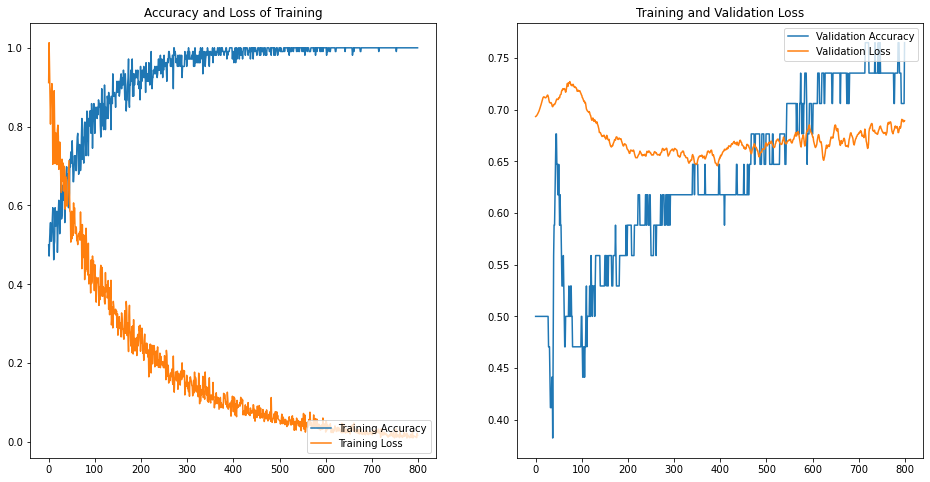

<Figure size 432x288 with 0 Axes>

In [34]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='lower right')
plt.title('Accuracy and Loss of Training')
plt.savefig('./save1.png', dpi=200)


plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig('./save2.png')

In [24]:
results = model.evaluate(X_test, y_test,batch_size=1,verbose=1)
print(y_test)

12/12 [==============================] - 0s 13ms/step - loss: 0.1747 - accuracy: 0.9167
[0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.]


In [25]:
from sklearn.metrics import accuracy_score,f1_score
test_predictions =model.predict(X_test)
test_predictions = np.round(test_predictions)
#print(test_predictions)
re=[]

for i in test_predictions:
    if i[0]==0 and i[1]==1:
        re+=[1.]
    else:
        re+=[0.]
print(re)
accuracy = accuracy_score(y_test, re)
print("ACC = "+str(accuracy))


[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
ACC = 0.9166666666666666


In [26]:
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score
results = model.evaluate(X_test, y_test,batch_size=10,verbose=1)
res_class=model.predict_classes(X_test,verbose=0)
print(y_test)
print(res_class)

2/2 [==============================] - 0s 29ms/step - loss: 0.1748 - accuracy: 0.9167
[0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.]
[0 0 1 0 0 0 1 1 0 0 1 1]


C:\Users\seo\.conda\envs\venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [27]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,res_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, res_class)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, res_class)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, res_class)
print('F1 score: %f' % f1)

Accuracy: 0.916667
Precision: 1.000000
Recall: 0.833333
F1 score: 0.909091


In [28]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# kappa
yhat_probs = model.predict(X_test, verbose=0)
yhat_probs = yhat_probs[:, 0]
kappa = cohen_kappa_score(y_test, res_class)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, res_class)
print(matrix)

Cohens kappa: 0.833333
ROC AUC: 0.000000
[[6 0]
 [1 5]]


No Skill: ROC AUC=0.500
model: ROC AUC=1.000


C:\Users\seo\.conda\envs\venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


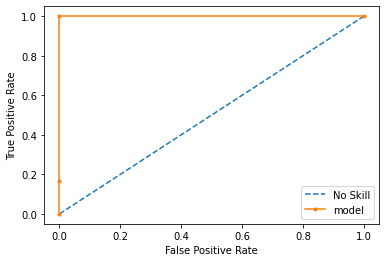

In [29]:
from sklearn.metrics import roc_curve
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
 
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('model: ROC AUC=%.3f' % (lr_auc))
 
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
 
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='model')
 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
# show the legend
plt.legend()
 
# show the plot
plt.show()

###### 

In [30]:
model.save('./model_tets.h5')

In [35]:
results = model.evaluate(X_test, y_test,batch_size=10,verbose=1)
res_class=model.predict_classes(X_test,verbose=0)
print(y_test)
print(res_class)

2/2 [==============================] - 0s 14ms/step - loss: 0.1748 - accuracy: 0.9167
[0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.]
[0 0 1 0 0 0 1 1 0 0 1 1]


C:\Users\seo\.conda\envs\venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [36]:
results = model.evaluate(X_test, y_test,batch_size=10,verbose=1)
res_class=model.predict_classes(X_test,verbose=0)
print(y_test)
print(res_class)

2/2 [==============================] - 0s 24ms/step - loss: 0.1748 - accuracy: 0.9167
[0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.]
[0 0 1 0 0 0 1 1 0 0 1 1]


In [38]:
results = model.evaluate(X_train,y_train,batch_size=10,verbose=1)
res_class=model.predict_classes(X_train,verbose=0)
print(y_train)
print(res_class)

11/11 [==============================] - 1s 66ms/step - loss: 0.0033 - accuracy: 1.0000
[1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.]
[1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1
 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0]
